In [450]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

In [451]:
df = pd.read_csv('Simulatie jamie_oliver&oost_europees.csv') # Importeren van de gesimuleerde dataset
df.head()

,Amuse zalm op een vorkje,Babka met chocolade en hazelnoten,Borsjt met dille en sour cream,Chocolade-kardemomcake,Eenvoudige rodekool,Frittata met lentegroenten,Gemengde geroosterde groenten,Goulash met paprikamix,Goulash met rijst en broccoli,Jamie Oliver's kip Kiev,Monique van Loons zoete-aardappellatkes met auberginesalade,Rijkgevulde goulashsoep,Romige paddenstoelensoep,Semifreddo met snickers,Simpele kaasfondue,Spi­na­zie-ri­cot­ta­ro­to­lo,Stroganoff-schnitzel met bonensalade,Vegetarische koolraapgoulash met rijst,Wellington van rundergehakt,Zuurkoolschotel met worst en champignons
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [535]:
X = df.drop('Gemengde geroosterde groenten', axis = 1).values # X zijn de features
y = df['Gemengde geroosterde groenten'].values # y is de target variabele

In [536]:
sum(y)/len(df)

0.37

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Hier wordt de data gesplit in train en test data. 
# Ik gebruik een random_state, zodat de RandomForestClassifier en DecisionTreeClassifier met dezelfde data wordt vergeleken. 

### RandomForestClassifier

In [538]:
RFC = RandomForestClassifier() # Hier wordt de RandomForestClassifier aangemaakt

In [539]:
param_grid = {'n_estimators' : [50, 100, 150, 200, 250], 
              'max_depth'    : [10, 20, 30, 40, 50]} 

# In het param_grid staan waardes om de hyperparameters mee te tunen.

In [540]:
rf_random = RandomizedSearchCV(estimator = RFC, param_distributions = param_grid, n_iter = 20, cv = 3)
# Met de RandomizedSearchCV worden de meest geschikte waardes van het param_grid voor de hyperparameters bepaald.

In [541]:
rf_random.fit(X_train , y_train) # Het model wordt gefit op de train data

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]})

In [542]:
rf_random.best_params_ # Dit zijn de beste waardes die zijn gekozen voor de hyperparameters

{'n_estimators': 200, 'max_depth': 30}

In [543]:
y_pred = rf_random.predict(X_test)# Met de features wordt voorspelt of iemand gemengde geroosterde groenten wel/niet lekker vindt

In [544]:
confusion_matrix(y_test, y_pred) # Dit is de confusion matrix voor de RFC: [[TN, FP]
#                                                                           [FN, TP]]

array([[13,  1],
       [ 1,  5]])

In [545]:
x_rfr = confusion_matrix(y_test, y_pred)[0][1]/ sum(confusion_matrix(y_test, y_pred)[0]) # False positive rate bij de confusion matrix
y_rfr = confusion_matrix(y_test, y_pred)[1][1]/ sum(confusion_matrix(y_test, y_pred)[1]) # True positive rate bij de confusion matrix
x_rfr, y_rfr

(0.07142857142857142, 0.8333333333333334)

In [546]:
accuracy_score(y_test, y_pred) # Berekenen van de accuracy

0.9

In [547]:
y_test_score = rf_random.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_score) # Hier worden de FPR en TPR berekend om de roc curve te maken
auc_test = roc_auc_score(y_test, y_test_score) # Dit is de auc (area under curve)

### DecisionTreeClassifier

In [548]:
from sklearn.tree import DecisionTreeClassifier

In [549]:
DTC = DecisionTreeClassifier() # Hier wordt de DecisionTreeClassifier aangemaakt

In [550]:
DTC.fit(X_train, y_train) # Het model wordt gefit op de training data 

DecisionTreeClassifier()

In [551]:
y_dtc_pred = DTC.predict(X_test)# Met de features wordt voorspelt of iemand gemengde geroosterde groenten wel/niet lekker vindt

In [552]:
accuracy_score(y_test, y_dtc_pred) # Berekenen van de accuracy

0.85

In [553]:
confusion_matrix(y_test, y_dtc_pred) # Dit is de confusion matrix voor de DTC: [[TN, FP]
#                                                                               [FN, TP]]

array([[11,  3],
       [ 0,  6]])

In [554]:
x_dtc = confusion_matrix(y_test, y_dtc_pred)[0][1]/ sum(confusion_matrix(y_test, y_dtc_pred)[0]) # False positive rate bij de confusion matrix
y_dtc = confusion_matrix(y_test, y_dtc_pred)[1][1]/ sum(confusion_matrix(y_test, y_dtc_pred)[1]) # True positive rate bij de confusion matrix
x_dtc, y_dtc

(0.21428571428571427, 1.0)

In [555]:
y_test_score_dtc = DTC.predict_proba(X_test)[:,1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_test_score_dtc) # Hier worden de FPR en TPR berekend om de roc curve te maken
auc_test_dtc = roc_auc_score(y_test, y_test_score_dtc) # Dit is de auc (area under curve)

In [556]:
precision_score(y_test, y_pred) # Precision bij de RFC

0.8333333333333334

In [557]:
precision_score(y_test, y_dtc_pred) # Precision bij de DTC

0.6666666666666666

In [558]:
recall_score(y_test, y_pred) # Recall bij de RFC

0.8333333333333334

In [559]:
recall_score(y_test, y_dtc_pred) # Recall bij de DTC

1.0

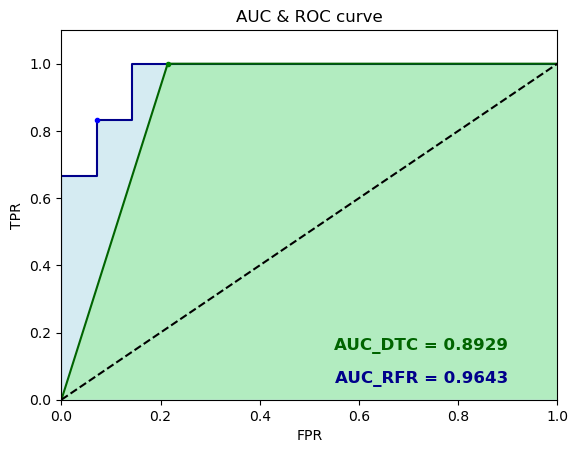

In [561]:
plt.plot(fpr, tpr, color = 'darkblue')
plt.plot(fpr_dtc, tpr_dtc, color = 'darkgreen')
plt.plot([0,1], [0,1], color = 'black', linestyle = 'dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0,1])
plt.ylim([0, 1.1])
plt.title('AUC & ROC curve')
plt.text(0.90, 0.05, 'AUC_RFR = %0.4f' % auc_test, ha='right', fontsize=12, weight='bold', color='darkblue')
plt.text(0.90, 0.15, 'AUC_DTC = %0.4f' % auc_test_dtc, ha='right', fontsize=12, weight='bold', color='darkgreen')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.5)
plt.fill_between(fpr_dtc, tpr_dtc, facecolor='lightgreen', alpha=0.5)
plt.plot(x_dtc, y_dtc,  '.', color = 'green')
plt.plot(x_rfr, y_rfr, '.', color = 'blue')
plt.show()

In [478]:
# Hierboven is de AUC & ROC curve te zien om beide classifiers met elkaar te vergelijken.
# Hoe groter de AUC score, des te beter het model is. In dit geval is het de RandomForestClassifier.